# Análisis exploratorio de datos

Como complemento al análisis realizado con Open Refine, se llevó a cabo un análisis exploratorio de datos donde, mediante el lenguaje de programación Python y algunas de sus librerías, se crearon visualizaciones que facilitaron la interpretación de los datos presentes en el conjunto de datos de que se dispone.

## Librerías

Primeramente, se cargaron las librerías a emplear:

In [1]:
!pip install tabulate

from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

You should consider upgrading via the '/home/usuario/.pyenv/versions/3.8.10/bin/python3.8 -m pip install --upgrade pip' command.


## Carga de los datos

Posteriormente, se cargaron los conjuntos de datos para poder manejarlos como dataframes (en este caso, dataframes de la librería Pandas):

In [2]:
SPORT_CENTERS_TENERIFE_FILEPATH = '../data/original/centros-deportivos-y-de-ocio-en-tenerife.csv'
CULTURE_CENTERS_TENERIFE_FILEPATH = '../data/original/centros-educativos-y-culturales-en-tenerife.csv'

sport_centers_df = pd.read_csv(SPORT_CENTERS_TENERIFE_FILEPATH)
sport_centers_df['File'] = 'Centros deportivos y de ocio'

culture_centers_df = pd.read_csv(CULTURE_CENTERS_TENERIFE_FILEPATH)
culture_centers_df['File'] = 'Centros educativos y culturales'

mixed_df = pd.concat([sport_centers_df, culture_centers_df])
mixed_df

,actividad_tipo,nombre,tipo_via_codigo,tipo_via_descripcion,direccion_nombre_via,direccion_numero,direccion_codigo_postal,municipio_codigo,municipio_nombre,referencia,web,email,telefono,fax,longitud,latitud,fecha_creacion,fecha_actualizacion,File
0,actividades deporte ocio,+Q Baile,CR,Carretera,General TF 194 La Cuesta Taco,99,38108,38023,La Laguna,Z I Las Torres De Taco,NaN,NaN,680283526.0,NaN,-16.293516,28.451643,2017-02-15T11:40:07,2018-01-17T08:05:33.210000,Centros deportivos y de ocio
1,actividades deporte ocio,360 Padel Indoor,CM,Camino,Los Pescadores,9,38108,38023,La Laguna,Z I Las Torres De Taco Nave 1A,NaN,NaN,822174792.0,NaN,-16.295783,28.452261,2017-02-15T11:40:07.893000,2017-02-16T13:51:26.067000,Centros deportivos y de ocio
2,actividades deporte ocio,Abama Golf,CR,Carretera,General TF 6237 Playa San Juan,0,38687,38019,Guía de Isora,Abama Los Maguenes,abamagolf.com,info@abamagolf.com,922126300.0,922865444.0,-16.793731,28.169149,2017-06-21T12:31:26.262000,2017-06-21T12:31:26.262000,Centros deportivos y de ocio
3,actividades deporte ocio,ABC Pilates Canarias,CL,Calle,Los Sueños,50,38006,38038,Santa Cruz de Tenerife,NaN,www.abcpilatescanarias.es,NaN,922270645.0,NaN,-16.262693,28.470030,2016-05-09T12:45:15.374000,2016-05-24T15:02:09.952000,Centros deportivos y de ocio
4,actividades deporte ocio,Abotis Center,CM,Camino,La Piterita,1,38320,38023,La Laguna,Pg Camino La Piterita,NaN,NaN,609504677.0,922467222.0,-16.290088,28.475771,2016-05-09T12:45:15,2018-03-21T07:52:52.224000,Centros deportivos y de ocio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,enseñanza infantil y primaria,Unidad de Apoyo de Santa Teresa de Jesus,CR,Carretera,El Rosario,3,38315,38026,La Orotava,NaN,NaN,NaN,NaN,NaN,-16.551857,28.377292,2016-05-09T12:45:15,2018-02-15T10:39:15.702000,Centros educativos y culturales
1045,enseñanza infantil y primaria,Unidad de Preescolar,CL,Calle,Magallon,6,38550,38004,Arafo,NaN,NaN,NaN,NaN,NaN,-16.423041,28.333807,2016-05-09T12:45:15.374000,2015-08-04T10:54:48.781000,Centros educativos y culturales
1046,enseñanza universitaria,Universidad Europea Canarias,CL,Calle,Inocencio Garcia,1,38300,38026,La Orotava,NaN,canarias.universidadeuropea.es,NaN,922985050.0,NaN,-16.524409,28.390535,2018-01-22T09:02:49.722000,2018-01-22T09:18:53.547000,Centros educativos y culturales
1047,guarderias centros infantiles,Vacanguro,AV,Avenida,Leonardo Torriani,59,38205,38023,La Laguna,Cruz de Piedra,www.facebook.com/vacanguroportabebe,vacanguro@gmail.com,688931118.0,922265270.0,-16.313005,28.481211,2016-05-09T12:45:15.374000,2018-01-15T12:48:23.745000,Centros educativos y culturales


Observamos que, tal y como teníamos en el proyecto de Open Refine, existen 2050 instancias de centros sean de ocio, deportivos o culturales (entre los dos datasets), y también observamos que mantienen el mismo esquema.

## Análisis de datos

Tras la carga de datos, procedemos a realizar el análisis exploratorio de los mismos (en combinación con el análisis exploratorio realizado con Open Refine).

Primeramente, obtenemos la distribución de diferentes columnas de interés en el dataset.

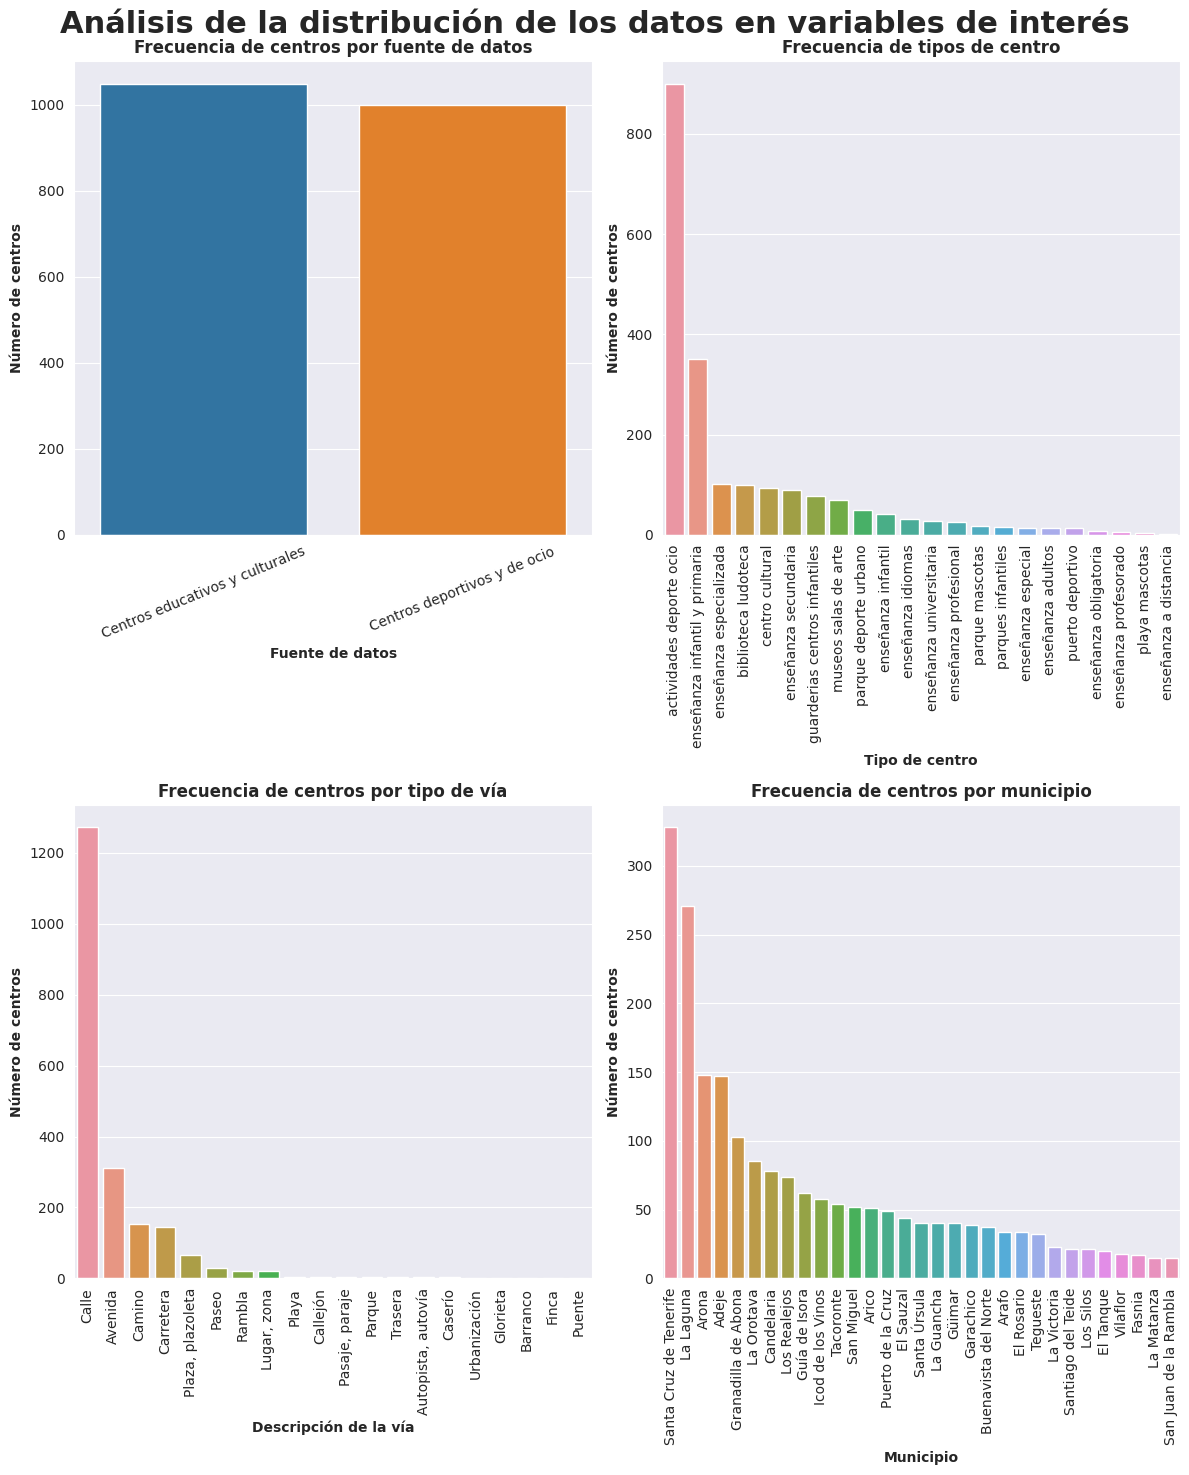

In [3]:
sns.set_style('darkgrid')

fig, axs = plt.subplots(2, 2, figsize = (12, 15))

# Plotting frequency bar chart for center type
sns.countplot(x = 'File', data = mixed_df, ax = axs[0, 0], order = mixed_df['File'].value_counts().index)
axs[0, 0].set_title('Frecuencia de centros por fuente de datos', fontweight = 'bold')
axs[0, 0].set_xlabel('Fuente de datos', fontweight = 'bold')
axs[0, 0].set_ylabel('Número de centros', fontweight = 'bold')
axs[0, 0].tick_params(axis = 'x', rotation = 22.5)

# Plotting frequency bar chart for activity type
sns.countplot(x = 'actividad_tipo', data = mixed_df, ax = axs[0, 1], order = mixed_df['actividad_tipo'].value_counts().index)
axs[0, 1].set_title('Frecuencia de tipos de centro', fontweight = 'bold')
axs[0, 1].set_xlabel('Tipo de centro', fontweight = 'bold')
axs[0, 1].set_ylabel('Número de centros', fontweight = 'bold')
axs[0, 1].tick_params(axis = 'x', rotation = 90)

# Plotting frequency bar chart for street type
sns.countplot(x = 'tipo_via_descripcion', data = mixed_df, ax = axs[1, 0], order = mixed_df['tipo_via_descripcion'].value_counts().index)
axs[1, 0].set_title('Frecuencia de centros por tipo de vía', fontweight = 'bold')
axs[1, 0].set_xlabel('Descripción de la vía', fontweight = 'bold')
axs[1, 0].set_ylabel('Número de centros', fontweight = 'bold')
axs[1, 0].tick_params(axis = 'x', rotation = 90)

# Plotting frequency bar chart for city
sns.countplot(x = 'municipio_nombre', data = mixed_df, ax = axs[1, 1], order = mixed_df['municipio_nombre'].value_counts().index)
axs[1, 1].set_title('Frecuencia de centros por municipio', fontweight = 'bold')
axs[1, 1].set_xlabel('Municipio', fontweight = 'bold')
axs[1, 1].set_ylabel('Número de centros', fontweight = 'bold')
axs[1, 1].tick_params(axis = 'x', rotation = 90)

plt.suptitle('Análisis de la distribución de los datos en variables de interés', fontweight = 'bold', fontsize = 22)
plt.tight_layout()
plt.savefig('imgs/data_distribution.png')
plt.show()

Observamos que, gracias al código anterior, obtenemos la distribución de datos para cada una de las variables de interés. Considerando estos datos, nos damos cuenta de que, efectivamente, hay tipos de vía más utilizados que otros para la localización de centros (sean deportivos o culturales), municipios mucho más frecuentes (como Santa Cruz de Tenerife), e incluso tipos de actividad más frecuente que otros (como `actividades deporte ocio`, relacionada con centros deportivos y de ocio que no sean parques, puertos o playas, o `enseñanza infantil y primaria`, que es la actividad cultural/educativa a la que se dedican más centros en Tenerife).

Por otro lado, se llevó a cabo un análisis sobre las variables de fecha (`fecha_creacion` y `fecha_actualizacion`) para intentar darles significado, pues son las dos únicas columnas del esquema de datos cuyo significado no pudo ser determinado con un simple vistazo sobre los datos. Para ello, primero se dispusieron como columnas de tipo fecha.

In [4]:
mixed_df['fecha_creacion'] = pd.to_datetime(mixed_df['fecha_creacion'])
mixed_df['fecha_actualizacion'] = pd.to_datetime(mixed_df['fecha_actualizacion'])

Tras ello, se determinaron valores básicos como mínimos y máximos para ambos casos, en una tabla:

In [6]:
pd.DataFrame(
    data = {
        'Columna' : ['fecha_creacion', 'fecha_actualizacion'],
        'Mínimo' : [mixed_df['fecha_creacion'].min(), mixed_df['fecha_actualizacion'].min()],
        'Máximo' : [mixed_df['fecha_creacion'].max(), mixed_df['fecha_actualizacion'].max()],
    }
) # .to_markdown(index = False)

,Columna,Mínimo,Máximo
0,fecha_creacion,2016-05-09 12:45:15,2023-11-02 12:51:29.751
1,fecha_actualizacion,2015-08-03 12:27:40,2023-11-13 13:26:29.939


Como se puede ver, las fechas de creación y actualización realmente no se corresponden con las fechas de creación de los centros en sí mismos, sino que más bien podrían estar vinculadas a las fechas de creación y última actualización de cada instancia del conjunto de datos.

Por otro lado, como parte del análisis exploratorio de datos se analizó la existencia de valores faltantes en las diferentes columnas del conjunto de datos. Concretamente, dicho análisis se resume en la siguiente figura:

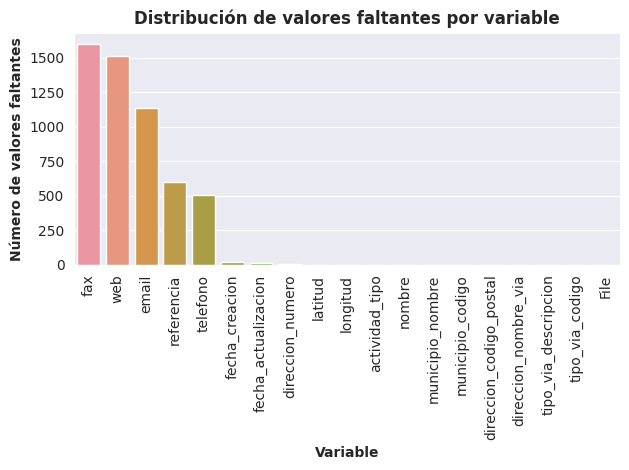

In [12]:
null_counts = mixed_df.isnull().sum().sort_values(ascending=False)


null_counts_df = null_counts.reset_index()
null_counts_df.columns = ['Column', 'Null Count']

sns.barplot(x='Column', y='Null Count', data=null_counts_df)
plt.tick_params(axis = 'x', rotation = 90)
plt.title('Distribución de valores faltantes por variable', fontweight = 'bold')
plt.xlabel('Variable', fontweight = 'bold')
plt.ylabel('Número de valores faltantes', fontweight = 'bold')
plt.tight_layout()
plt.savefig('imgs/nulls_distribution.png')
plt.show()